# 1. Implemente o Método da Eliminação Gaussiana, Decomposição $P^tLU$, Decomposição de Cholesky e substituição reversa para resolver $Ax = b$. Escolha 3 sistemas de equação lineares distintos, com 3 equações e 3 incógnitas, onde seja necessário realizar troca de linhas em pelo menos um deles. Resolva os sistemas aplicando cada um dos métodos. Exiba a matriz de permutação $P$ obtida de cada sistema.

## Eliminacao Gaussiana

In [ ]:
import numpy as np
from numpy import array

In [ ]:
def substituicao_reversa(A, n):

  x=[]
  for i in range(n-1,-1,-1):
    soma = 0

    if i == n-1:
      x.append(A[i,n]/A[i,i])
    else:
      for j in range(i + 1, n):
        soma += A[i, j] * x[j - i - 1]
      
      x.append((A[i,n] - soma)/A[i,i])
  return x

In [ ]:
def eliminacao_gaussiana(A, n, prints=True):
  """
    A: matriz aumentada
    n: numero de incognitas

    return: array de tamanho n
  """

  if prints:
    print(f"A(0):\n {A}")
    print()

  for i in range(n-1):
    p = A[i][i]
    j = i

    if p == 0:
      p_aux = p
      while p_aux == 0:
        j += 1
        try:
          p_aux = A[j, i]
        except IndexError:
          print("Nao existe solucao unica")
          return 
      p = p_aux

      # Trocando as linhas de lugar
      linha_aux = np.copy(A[j,:])
      A[j,:] = A[i,:]
      A[i,:] = linha_aux       

    for k in range(i+1, n):
      multiplicador = A[k,i]/p
      A[k,:] = A[k,:] - multiplicador * A[i,:]
    
    if prints:
      print(f"A({i+1}):\n {A}")
      print()

    # Substituicao reversa
    return substituicao_reversa(A,n)

In [ ]:
E = np.array([[1,1,1,1],  
              [2,1,-1,0],  
              [2,2,1,1]], dtype='double')  
print("Resultado:",eliminacao_gaussiana(E, 3))

A(0):
 [[ 1.  1.  1.  1.]
 [ 2.  1. -1.  0.]
 [ 2.  2.  1.  1.]]

A(1):
 [[ 1.  1.  1.  1.]
 [ 0. -1. -3. -2.]
 [ 0.  0. -1. -1.]]

Resultado: [1.0, -1.0, 1.0]


## Decomposicao Pt LU

In [ ]:
def matriz_permutacao(A):
  n = len(A)
  P = np.eye(n) # matriz de permutacao

  for i in range(n):
    k = list(A[:,i]).index(max(A[:,i], key=abs))

    linha_i = list(P[i,:]).index(1)
    linha_k = list(P[k,:]).index(1)

    P[i,linha_i] = 0
    P[i,linha_k] = 1

    P[k,linha_k] = 0
    P[k,linha_i] = 1

  return P

In [ ]:
# nao troca as linhas
def get_LU(A,prints=True):
  """
    A: matriz dos coeficientes do sistema
    return: lista com duas matrizes (L e U, respectivamente)  

    Definição: função para decompor as matrizes L e U
  """

  n = A.shape[0]
  U = A.copy()
  L = np.eye(n) # matriz identidade

  if prints:
    print(f"L (0):\n {L}")
    print(f"U (0):\n {U}")
    print()

  for i in range(n-1):
    for j in range(i+1,n):

      if U[j,i] != 0:
        L[j,i] = U[j,i]/U[i,i]
        U[j,i:n] = U[j, i:n] - (L[j,i] * U[i,i:n])

    if prints:
      print(f"L ({i+1}):\n {L}")
      print(f"U ({i+1}):\n {U}")
      print()

  return [L,U]

In [ ]:
def substituicao_reversaU(U, y):
  n = U.shape[0]
  x = np.zeros(n)

  x[n-1] = y[n-1]/U[n-1,n-1]

  for i in range(n-2, -1, -1):
    x[i] = (y[i] - np.dot(U[i,i:n], x[i:n])) / U[i,i]

  return x

In [ ]:
def substituicao_reversaL(L, b):
  n = L.shape[0]
  x = np.zeros(n)

  x[0] = b[0]/L[0,0]

  for i in range(1,n):
    x[i] = (b[i] - np.dot(L[i,0:i], x[0:i])) / L[i,i]

  return x

In [ ]:
# nao troca as linhas
def decomposicao_LU(A, b,prints=True):
  L, U = get_LU(A,prints)
  y = substituicao_reversaL(L,b)
  x = substituicao_reversaU(U,y)

  return x

In [ ]:
def decomposicao_PtLU(A,b,prints=True):
  P = matriz_permutacao(A)
  PA = np.dot(P,A)

  if prints:
    print(f"P:\n {P}")
    print(f"PA:\n {PA}\n")

  L, U = get_LU(PA,prints)
  y = substituicao_reversaL(L,np.matmul(P,b))
  x = substituicao_reversaU(U,y)

  # A_aumentada = np.zeros((A.shape[0], A.shape[1]+1))
  # A_aumentada[:,:-1] = A
  # A_aumentada[:,-1:] = b.reshape(A.shape[0], 1)

  return x

In [ ]:
A = np.array([[3.,-4.,1.],[1.,2.,2.],[4.,0.,-3.]])
b = np.array([9.,3.,2.])

print("Resultado:", decomposicao_PtLU(A,b))
# P=matriz_permutacao(A)
# np.dot(P,A)

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
PA:
 [[ 1.  2.  2.]
 [ 4.  0. -3.]
 [ 3. -4.  1.]]

L (0):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U (0):
 [[ 1.  2.  2.]
 [ 4.  0. -3.]
 [ 3. -4.  1.]]

L (1):
 [[1. 0. 0.]
 [4. 1. 0.]
 [3. 0. 1.]]
U (1):
 [[  1.   2.   2.]
 [  0.  -8. -11.]
 [  0. -10.  -5.]]

L (2):
 [[1.   0.   0.  ]
 [4.   1.   0.  ]
 [3.   1.25 1.  ]]
U (2):
 [[  1.     2.     2.  ]
 [  0.    -8.   -11.  ]
 [  0.     0.     8.75]]

Resultado: [ 1.57142857 -0.71428571  1.42857143]


In [ ]:
E = np.array([[1.,1.,1.],  
              [2.,1.,-1.],  
              [2.,-1.,1.]])  

b = np.array([-2.,1.,3.])

print("Resultado:",decomposicao_LU(E, b))

L (0):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U (0):
 [[ 1.  1.  1.]
 [ 2.  1. -1.]
 [ 2. -1.  1.]]

L (1):
 [[1. 0. 0.]
 [2. 1. 0.]
 [2. 0. 1.]]
U (1):
 [[ 1.  1.  1.]
 [ 0. -1. -3.]
 [ 0. -3. -1.]]

L (2):
 [[1. 0. 0.]
 [2. 1. 0.]
 [2. 3. 1.]]
U (2):
 [[ 1.  1.  1.]
 [ 0. -1. -3.]
 [ 0.  0.  8.]]

Resultado: [ 1. -2. -1.]


## Método de Cholesky

In [ ]:
import math

In [ ]:
def cholesky(A):
    n = len(A)
    L = np.zeros((n,n))

    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k):
                L[i][k] = (A[i][i] - tmp_sum)**(0.5)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return np.array(L)

In [ ]:
def matriz_permutacao(A):
  n = len(A)
  P = np.eye(n) # matriz de permutacao

  for i in range(n):
    k = list(A[:,i]).index(max(A[:,i], key=abs))

    linha_i = list(P[i,:]).index(1)
    linha_k = list(P[k,:]).index(1)

    P[i,linha_i] = 0
    P[i,linha_k] = 1

    P[k,linha_k] = 0
    P[k,linha_i] = 1

  return P

In [ ]:
def decomposicao_cholesky(A,b,prints=True):
  P = matriz_permutacao(A)
  PA = np.dot(P,A)

  if prints:
    print(f"P:\n {P}")
    print(f"PA:\n {PA}\n")

  L, U = get_LU(PA,prints)
  y = substituicao_reversaL(L,np.matmul(P,b))
  x = substituicao_reversaU(U,y)

  return x

In [ ]:
A = np.array([[3.,-4.,1.],[1.,2.,2.],[4.,0.,-3.]])
b = np.array([9.,3.,2.])

L = decomposicao_cholesky(A,b)

print(A)
print(L)

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
PA:
 [[ 1.  2.  2.]
 [ 4.  0. -3.]
 [ 3. -4.  1.]]

L (0):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U (0):
 [[ 1.  2.  2.]
 [ 4.  0. -3.]
 [ 3. -4.  1.]]

L (1):
 [[1. 0. 0.]
 [4. 1. 0.]
 [3. 0. 1.]]
U (1):
 [[  1.   2.   2.]
 [  0.  -8. -11.]
 [  0. -10.  -5.]]

L (2):
 [[1.   0.   0.  ]
 [4.   1.   0.  ]
 [3.   1.25 1.  ]]
U (2):
 [[  1.     2.     2.  ]
 [  0.    -8.   -11.  ]
 [  0.     0.     8.75]]

[[ 3. -4.  1.]
 [ 1.  2.  2.]
 [ 4.  0. -3.]]
[ 1.57142857 -0.71428571  1.42857143]


# 2. Implemente o algoritmo abaixo para gerar, aleatoriamente, matrizes positivas definidas. Exiba 3 exemplos e explique porque qualquer matriz gerada com este algoritmo é positiva definida.

****

****

**Entrada:** dimensão n da matriz pos. def. aleatória quadrada $A_{nXn}$

**Saída:** matriz pos. def. aleatória quadrada $A_{nXn}$

$A=rand(n,n);$

$A=0.5*(A+A^T);$

$A=A+n*I_n;$

****

In [ ]:
import numpy as np
import random

In [ ]:
# np.random.seed(42)

In [ ]:
def generatePositiveDefiniteMatrix(n):
  A = np.random.rand(n, n)
  A = 0.5 * (A + A.transpose())
  A = A + (n * np.identity(n))
  return A

Para que tenhamos uma matriz positiva definida precisamos que $x^tAx > 0$. Sendo A uma matriz com todos os seus termos positivos, e que os termos de $x$ e $x^t$ se multiplicam, teremos então sempre uma saída positiva, e isso implica que $x^tAx > 0$. Além de que, na linha $A = A + (n * I_n)$, são somados valores muitos maiores do que os que se encontram na diagonal da matriz, o que faz com que após as operações de eliminação, os pivôs sejam sempre positivos. Com isso, podemos garantir que o algoritmo acima sempre irá gerar uma matriz positiva definida.

In [ ]:
def isPositive(n):
  return n > 0

for i in range(2, 5):
  matriz = generatePositiveDefiniteMatrix(i)
  print(f"Matriz {i}x{i} positiva definida gerada aleatoriamente")
  print(matriz, "\n")
  print("Achando os autovalores da matriz acima")
  w, v = np.linalg.eig(matriz)
  print(w)
  if list(map(isPositive, w)):
    print(f"Podemos perceber que todos os autovalores da matriz são positivos, então temos que a matriz é positiva definida", "\n")
    print("########################################################################")

Matriz 2x2 positiva definida gerada aleatoriamente
[[2.20933464 0.60354155]
 [0.60354155 2.67910271]] 

Achando os autovalores da matriz acima
[1.79658226 3.09185508]
Podemos perceber que todos os autovalores da matriz são positivos, então temos que a matriz é positiva definida 

########################################################################
Matriz 3x3 positiva definida gerada aleatoriamente
[[3.96081133 0.4453792  0.62258218]
 [0.4453792  3.76785609 0.2614209 ]
 [0.62258218 0.2614209  3.88495551]] 

Achando os autovalores da matriz acima
[4.79546319 3.25717353 3.56098621]
Podemos perceber que todos os autovalores da matriz são positivos, então temos que a matriz é positiva definida 

########################################################################
Matriz 4x4 positiva definida gerada aleatoriamente
[[4.7075983  0.29358274 0.52934183 0.59875407]
 [0.29358274 4.54348615 0.39680602 0.48739146]
 [0.52934183 0.39680602 4.09843372 0.79932007]
 [0.59875407 0.48739146 0.79932

# 3. Realize o seguinte experimento para comparar a performance dos 3 métodos da questão 1, considerando os seguintes valores de n: 10, 100, 500, 1.000, 1.500 e 2.000.

## a) Para cada valor de n, gere 10 matrizes positivas definidas aleatórias $nXn$ e 10 vetores aleatórios $b \neq 0$ com n entradas e resolva os sistemas $Ax = b$, onde $A$ é cada uma das matrizes geradas, usando os 3 métodos da questão 1. Guarde o tempo de execução total de cada método, para cada $n$.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import time
n = [10, 100, 500, 1000, 1500, 2000]

matrizes = []
b = []
tempo_gauss = []
tempo_PtLU = []
tempo_cholesky = []
indice = 0

for i in n:
  for k in range(10):
    matrizes.append(generatePositiveDefiniteMatrix(i))
    b.append(np.random.rand(i))

    # GAUSSIANA
    A_aumentada = np.zeros((i,i+1))
    A_aumentada[:,:-1] = matrizes[indice]
    A_aumentada[:,-1:] = b[indice].reshape(i, 1)

    t_inicio = time.time()
    eliminacao_gaussiana(A_aumentada, len(A_aumentada),False)
    t_fim = time.time()

    tempo_gauss.append(t_fim-t_inicio)


    # PtLU
    t_inicio = time.time()
    decomposicao_PtLU(matrizes[indice],b[indice],False)
    t_fim = time.time()

    tempo_PtLU.append(t_fim-t_inicio)


    # CHOLESKY
    t_inicio = time.time()
    decomposicao_cholesky(matrizes[indice],b[indice],False)
    t_fim = time.time()

    tempo_cholesky.append(t_fim-t_inicio)

    indice+=1


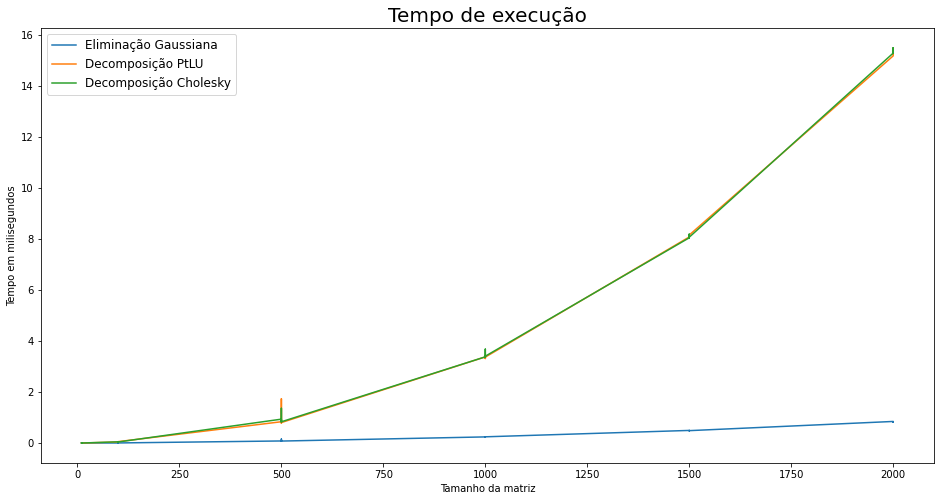

In [ ]:
tamanhos = [10]*10 + [100]*10 + [500]*10 + [1000]*10 + [1500]*10 + [2000]*10

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Tempo de execução',fontsize=20)
ax.plot(tamanhos,tempo_gauss, label="Eliminação Gaussiana")
ax.plot(tamanhos,tempo_PtLU, label="Decomposição PtLU")
ax.plot(tamanhos,tempo_cholesky, label="Decomposição Cholesky")
ax.legend(loc="upper left", prop={'size': 12})
ax.set_xlabel('Tamanho da matriz')
ax.set_ylabel('Tempo em milisegundos')
plt.show()

## b) Para cada valor de $n$, gere 1 única matriz positiva definida aleatória $n×n$ e 10 vetores $b \neq 0$ aleatórios com n entradas e resolva os sistemas $Ax = b$ usando os 3 métodos da questão 1. Na sua implementação, leve em conta que alguns métodos não precisam recalcular decomposições para valores de $A$ iguais. Guarde o tempo de execução total de cada método, para cada $n$.

In [ ]:
import time
n = [10, 100, 500, 1000, 1500, 2000]

matrizes = []
b = []
menor_tempo_gauss = []
menor_tempo_PtLU = []
menor_tempo_cholesky = []
indice = 0

for i in n:
  matrizes.append(generatePositiveDefiniteMatrix(i))
  b.append(np.random.rand(i))

  # GAUSSIANA
  A_aumentada = np.zeros((i,i+1))
  A_aumentada[:,:-1] = matrizes[indice]
  A_aumentada[:,-1:] = b[indice].reshape(i, 1)

  t_inicio = time.time()
  eliminacao_gaussiana(A_aumentada, len(A_aumentada),False)
  t_fim = time.time()

  menor_tempo_gauss.append(t_fim-t_inicio)


  # PtLU
  t_inicio = time.time()
  decomposicao_PtLU(matrizes[indice],b[indice],False)
  t_fim = time.time()

  menor_tempo_PtLU.append(t_fim-t_inicio)


  # CHOLESKY
  t_inicio = time.time()
  decomposicao_cholesky(matrizes[indice],b[indice],False)
  t_fim = time.time()

  menor_tempo_cholesky.append(t_fim-t_inicio)

  indice+=1


ValueError: ignored

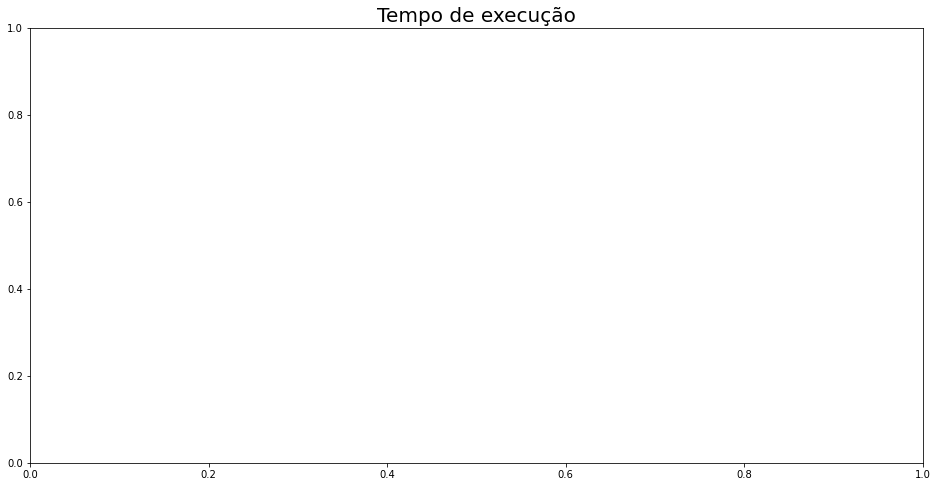

In [ ]:
tamanhos = [10] + [100] + [500] + [1000] + [1500] + [2000]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Tempo de execução',fontsize=20)
ax.plot(tamanhos,tempo_gauss, label="Eliminação Gaussiana")
ax.plot(tamanhos,tempo_PtLU, label="Decomposição PtLU")
ax.plot(tamanhos,tempo_cholesky, label="Decomposição Cholesky")
ax.legend(loc="upper left", prop={'size': 12})
ax.set_xlabel('Tamanho da matriz')
ax.set_ylabel('Tempo em milisegundos')
plt.show()

## c) Considerando os resultados dos itens (a) e (b), compare os tempos de execução plotando uma única figura com os 6 gráficos de tempos de execução em função do tamanho da matriz $n$, onde o eixo horizontal representa o tamanho n da matriz e o eixo vertical o tempo de execução. Cada gráfico deve ser exibido como uma curva poligonal (veja a figura abaixo). Qual método funciona melhor na letra a) ? E na letra b) ?

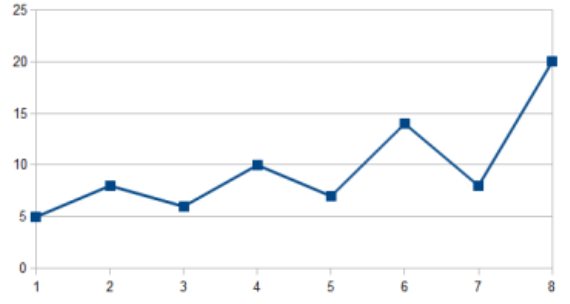

In [ ]:
from IPython.core.pylabtools import figsize
tamanho_menor = [10] + [100] + [500] + [1000] + [1500] + [2000]
tamanho_maior = [10]*10 + [100]*10 + [500]*10 + [1000]*10 + [1500]*10 + [2000]*10

fig, ax = plt.subplots(2, 3, figsize=(20,8))

fig.suptitle('Tempo de execução', fontsize=16)

# Tamanho maiores

ax[0,0].plot(tamanho_maior,tempo_gauss, label="Eliminação Gaussiana")
ax[0,1].plot(tamanho_maior,tempo_PtLU, label="Decomposição PtLU")
ax[0,2].plot(tamanho_maior,tempo_cholesky, label="Decomposição Cholesky")


# Tamanho menores

ax[1,0].plot(tamanho_menor,menor_tempo_gauss, label="Eliminação Gaussiana")
ax[1,1].plot(tamanho_menor,menor_tempo_PtLU, label="Decomposição PtLU")
ax[1,2].plot(tamanho_menor,menor_tempo_cholesky, label="Decomposição Cholesky")

# ax.set_xlabel('Tamanho da matriz')
# ax.set_ylabel('Tempo em milisegundos')
plt.show()